In [80]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score

In [81]:
df = pd.read_csv('dados/silver/dados_tratados_com_features_novas_com_labels.csv', index_col=0)
df = df[df['label'].notnull()]
df = df.reset_index().drop('index', axis=1)
y = df['label'].astype('int')
print(df.shape, y.shape)

(500, 16) (500,)


In [82]:
df.head(3)

,id,titulo,label,canal,data_upload,categoria,tags,duracao_segundos,link,visualizacoes,quantidade_likes,query,tempo_desde_pub,visualizacoes_por_dia,Unnamed: 15,Unnamed: 16
0,watch?v=kE9gYQDyVr0,Trabalhando com Bases de Dados (Datasets) Desb...,0.0,Hashtag Programação,2023-04-17,['Education'],"['Bases de dados desbalanceadas', 'Datasets de...",1326.0,https://www.youtube.com/watch?v=kE9gYQDyVr0,858,72.0,ciencia+de+dados,3.0,286.0,NaN,NaN
1,watch?v=GgEUPkAG1ho,Trabalho ciencia de dados-parte-1,0.0,Jonas Silva,2023-04-13,['People & Blogs'],NaN,389.0,https://www.youtube.com/watch?v=GgEUPkAG1ho,2,0.0,ciencia+de+dados,7.0,0.2857142857142857,NaN,NaN
2,watch?v=U1a_Tp0O1Co,Como Aprender CIÊNCIA DE DADOS do ZERO?,0.0,Hashtag Programação,2023-04-10,['Education'],"['Como aprender ciência de dados', 'Como apren...",1514.0,https://www.youtube.com/watch?v=U1a_Tp0O1Co,1,173.0,ciencia+de+dados,10.0,0.1,NaN,NaN


# Features

In [117]:
features = df[['visualizacoes', 'visualizacoes_por_dia']]
features = features.astype(float)

In [118]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   visualizacoes          500 non-null    float64
 1   visualizacoes_por_dia  500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [119]:
X_train, X_test = features[df['data_upload'] < '2023-03-01'], features[df['data_upload'] >= '2023-03-01'] 
y_train, y_test = y[df['data_upload'] < '2023-03-01'], y[df['data_upload'] >= '2023-03-01'] 

In [120]:
print(X_train.shape, y_train.shape)

(345, 2) (345,)


In [121]:
print(X_test.shape, y_test.shape)

(155, 2) (155,)


In [122]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight="balanced")
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [123]:
probabilidade = decision_tree.predict_proba(X_test)[:, 1]

## Precision e Recall
Se for calculado a precision e o recall, e plotar o gráfico desses todos pontos, a `área sobre a curva`.
* Precision: De todos os exemplos que o modelo disse que são positivos, quantos são realmente positivos.
* Recall: É a taxa de detecção de todos os exemplos que são positivos, quanto o modelo preveu que são positivos

In [124]:
average_precision_score(y_test, probabilidade) # baseline
#0.28855045521712186 #-> com 4 variáveis ('visualizacoes', 'visualizacoes_por_dia', 'quantidade_likes', 'duracao_segundos')
# 0.27195362537631207 -> com 2 variáveis ('visualizacoes', 'visualizacoes_por_dia')

0.27195362537631207

## ROC AUC
* probabilidade dos exemplos positivos
    * Positivos = [0.1, 0.2, 0.3] 
* probabilidade de os exemplos serem negativos
    * negativos = [0.05, 0.15, 0.25]

> Nesse caso é um amostra com reposição (pega os valores, avalia e devolve)

pos = 0.2, neg = 0.05 > o positivo tem probabilidade maior que o negativo: sim, 1, True

pos - 0.1, neg = 0.15 > o positivo tem probabilidade maior que o negativo: não, 0, False

In [125]:
roc_auc_score(y_test, probabilidade)
# 0.5415086388537717 -> com 4 variáveis ('visualizacoes', 'visualizacoes_por_dia', 'quantidade_likes', 'duracao_segundos')
# 0.4626000842815002 -> com 2 variáveis ('visualizacoes', 'visualizacoes_por_dia')

0.4626000842815002

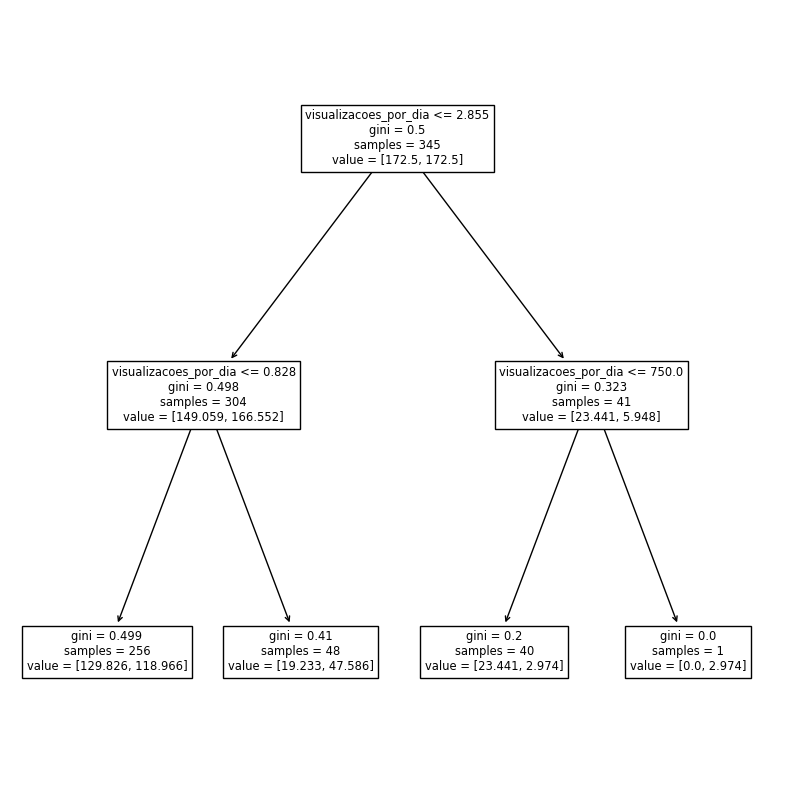

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_tree(decision_tree, ax=ax,feature_names=X_train.columns)
plt.show()

|Modelo| Precision | AUC| Número de variáveis preditoras
|------|-----------|----|--------------------|
|modelo 1 (Baseline)| 0.27195362537631207| 0.4626000842815002| 2 variáveis|